$$
\Huge \text{TEORIA PERKOLACJI W POŻARACH LASÓW}
$$

$$
\Large \text{Autorzy: Alicja Górnik, Ewa Herman, Julia Krempińska, Jagoda Płócienniczak}
$$

In [311]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from PIL import Image, ImageDraw

#### 1. Drzewa mogą znajdować się w następujących stanach, opisanych poszczególnymi kolorami:
- 0 - brak drzewa (kolor biały)
- 1 - drzewo (kolor zielony)
- 2 - palącce się drzewo (kolor czerwony)
- 3 - spalone drzewo (kolor szary)

In [312]:
tree_cond = {"EMPTY": 0, "TREE": 1, "BURNING": 2, "BURNED": 3}
tree_color = {0: "white", 1: "green", 2: "red", 3: "grey"}

#### 2. Poczatkowe parametry siatki 2D.

In [313]:
size = 50  # Rozmiar siatki
p_fire = 0.7   # Prawdopodobieństwo zapalenia sąsiedniego drzewa
p_tree = 0.6  # Prawdopodobieństwo początkowego istnienia drzewa / zalesienie

#### 3. Początkowa siatka 2D (jeszcze przed pożarem).

In [314]:
cmap = ListedColormap(tree_color.values())

In [315]:
def forest_grid(size, p_tree):
    forest = np.random.choice([tree_cond["EMPTY"], tree_cond["TREE"]], size=(size, size), p=[1-p_tree, p_tree])
    return forest

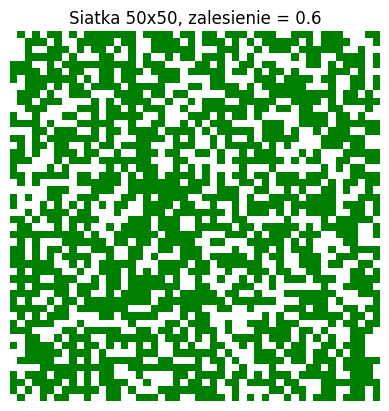

In [316]:
grid = forest_grid(size, p_tree)
plt.imshow(grid, cmap=cmap, vmin=0, vmax=3)
plt.axis('off')
plt.title(f'Siatka {size}x{size}, zalesienie = {p_tree}')
plt.show()

#### 4. Sąsiedztwo (Von Neumanna i Moore'a)

In [317]:
def get_neighbors(x, y, size, neighborhood):
    if neighborhood == "von_neumann":
        neighbors = np.array([(x-1, y), (x+1, y), (x, y-1), (x, y+1)])
    elif neighborhood == "moore":
        neighbors = np.array([(x-1, y-1), (x-1, y), (x-1, y+1),  
                            (x, y-1), (x, y+1),             
                            (x+1, y-1), (x+1, y), (x+1, y+1)])
    else:
        return [] 
    neighbors = [(nx, ny) for nx, ny in neighbors if 0 <= nx < size and 0 <= ny < size] 
    return neighbors

#### 5. Pożar i jego rozprzestrzenianie się

In [318]:
def start_fire(forest_before_fire):
    forest = forest_before_fire.copy()
    forest[0, :] = np.where(forest[0, :] == tree_cond["TREE"], tree_cond["BURNING"], forest[0, :])
    return forest

In [319]:
def spread_fire(forest_with_fire, size, p_fire, neighborhood):
    new_forest = forest_with_fire.copy()
    size = forest_with_fire.shape[0]

    for x in range(size):
        for y in range(size):
            if forest_with_fire[x, y] == tree_cond["BURNING"]:
                new_forest[x, y] = tree_cond["BURNED"]
                
                for nx, ny in get_neighbors(x, y, size, neighborhood):
                    if forest_with_fire[nx, ny] == tree_cond["TREE"]:
                        if np.random.rand() < p_fire:
                            new_forest[nx, ny] = tree_cond["BURNING"]
    return new_forest

#### 6. Sumulacja rozprzestrzeniania się ognia

In [ ]:
def fire_simulation(size, p_fire, p_tree, neighborhood, gif_name, M_frames=100):
    forest = forest_grid(size, p_tree)
    frames = []

    for step in range(M_frames):
        if step == 0:
            fig, ax = plt.subplots(figsize=(7, 7), dpi=80)
            ax.imshow(forest, cmap=cmap, vmin=0, vmax=3)
            ax.axis('off')
            ax.set_title(f'Pusty las {size}x{size}, zalesienie = {p_tree}')
            plt.draw()
            fig.canvas.draw()
            buf = fig.canvas.buffer_rgba()
            image = Image.frombytes('RGBA', fig.canvas.get_width_height(), buf)
            frames.append(image)
            plt.close(fig)

        elif step == 1:
            forest = start_fire(forest)
            fig, ax = plt.subplots(figsize=(7, 7), dpi=80)
            ax.imshow(forest, cmap=cmap, vmin=0, vmax=3)
            ax.axis('off')
            ax.set_title(f'Siatka {size}x{size}, zalesienie = {p_tree}')
            plt.draw()
            fig.canvas.draw()
            buf = fig.canvas.buffer_rgba()
            image = Image.frombytes('RGBA', fig.canvas.get_width_height(), buf)
            frames.append(image)
            plt.close(fig)

        else:
            forest = spread_fire(forest, size, p_fire, neighborhood)
            fig, ax = plt.subplots(figsize=(7, 7), dpi=80)
            ax.imshow(forest, cmap=cmap, vmin=0, vmax=3)
            ax.axis('off')
            ax.set_title(f'Siatka {size}x{size}, zalesienie = {p_tree}')
            plt.draw()
            fig.canvas.draw()

            buf = fig.canvas.buffer_rgba()
            image = Image.frombytes('RGBA', fig.canvas.get_width_height(), buf)
            frames.append(image)
            plt.close(fig)

    frames[0].save(f'{gif_name}.gif', save_all=True, append_images=frames[1:], loop=0, duration=200)
    print(f"Animacja została zapisana jako '{gif_name}.gif'")

In [321]:
fire_simulation(size, p_fire = 1, p_tree = 0.6, neighborhood="von_neumann", gif_name = "Neumann_50x50", M_frames=100)

Animacja została zapisana jako 'Neumann_50x50.gif'


In [322]:
fire_simulation(size, p_fire, p_tree, neighborhood="moore", gif_name = "Moore_50x50", M_frames=100)

Animacja została zapisana jako 'Moore_50x50.gif'


#### 7. Szybkość rozprzestrzeniania się pożaru w czasie.